In [1]:
!unzip ml-latest-small.zip -d data_small

Archive:  ml-latest-small.zip
   creating: data_small/ml-latest-small/
  inflating: data_small/ml-latest-small/links.csv  
  inflating: data_small/ml-latest-small/tags.csv  
  inflating: data_small/ml-latest-small/ratings.csv  
  inflating: data_small/ml-latest-small/README.txt  
  inflating: data_small/ml-latest-small/movies.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
%load_ext autoreload
%autoreload 2

In [84]:
from src.load import load_data

dr = 'data_small/ml-latest-small/'
movies, ratings, tags = load_data(dr)

In [95]:
ratings['rating'] = ratings['rating'] // 0.5 
ratings['rating'] = ratings['rating'].astype('int')
ratings['rating'] -= 1
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,6.003114
std,182.618491,35530.987199,2.085058
min,1.000000,1.000000,0.000000
25%,177.000000,1199.000000,5.000000
50%,325.000000,2991.000000,6.000000
75%,477.000000,8122.000000,7.000000
max,610.000000,193609.000000,9.000000


In [79]:
from src.preprocess import preprocess_movies, generate_users
from src.tokenizer import WordTokenizer

# concatenate tags and titles
tags_titles = np.concatenate([tags['tag'].values, movies['title'].values])
tokenizer = WordTokenizer(tags_titles)

In [90]:
movies = preprocess_movies(movies, ratings, tokenizer)

In [91]:
movies.head()

,title,Other,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,avg_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,toy story,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,7.841860
2,jumanji,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,6.863636
3,grumpier old men,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1995,6.519231
4,waiting exhale,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1995,4.714286
5,father bride part ii,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,6.142857


In [85]:
users = generate_users(movies, ratings, tags, n=10, min_count=1, tokenizer=tokenizer)

In [92]:
users.head()

,positive_0,positive_1,positive_2,positive_3,positive_4,positive_5,positive_6,positive_7,positive_8,positive_9,...,negative_0,negative_1,negative_2,negative_3,negative_4,negative_5,negative_6,negative_7,negative_8,negative_9
userId,,,,,,,,,,,,,,,,,,,,,
1,sci,fi,comedy,classic,space,dark,twist,ending,action,disney,...,alfred,hitchcock,psychology,murder,suspenseful,tense,based,book,creepy,disturbing
2,leonardo,dicaprio,suspense,psychological,thought,provoking,funny,ferrell,martin,scorsese,...,,,,,,,,,,
3,,,,,,,,,,,...,high,school,holocaust,war,moving,thought,provoking,teacher,gulf,aardman
4,classic,space,sci,fi,music,comedy,netflix,queue,imdb,top,...,twist,ending,violence,dark,r,comedy,dialogue,great,nonlinear,crime
5,r,violence,dialogue,good,great,soundtrack,cult,film,tarantino,disney,...,time,travel,wedding,spies,,,,,,


In [89]:
ratings.rating.min(), ratings.rating.max()

(1, 10)

In [94]:
movies

,title,Other,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,avg_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,toy story,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,7.841860
2,jumanji,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,6.863636
3,grumpier old men,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1995,6.519231
4,waiting exhale,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1995,4.714286
5,father bride part ii,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,6.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,black butler book atlantic,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2017,8.000000
193583,game life zero,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2017,7.000000
193585,flint,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2017,7.000000


([<matplotlib.patches.Wedge at 0x2123dd91ae0>,
 [Text(0.7378653467312977, 0.8158153774556484, '7'),
  Text(-0.7293106517426986, 0.8234719019217598, '5'),
  Text(-1.0801622129161779, -0.20796536679944014, '9'),
  Text(-0.5840615947999327, -0.9321330664018734, '6'),
  Text(0.12723704283076437, -1.0926164628686876, '8'),
  Text(0.6369835883816279, -0.8968009300466101, '3'),
  Text(0.9406208010143207, -0.5702915997094627, '4'),
  Text(1.055769095320597, -0.3087905720159348, '1'),
  Text(1.0890579733646863, -0.15476669748625563, '2'),
  Text(1.0989981433267744, -0.046936989297386, '0')],
 [Text(0.40247200730798055, 0.44499020588489907, '26.6%'),
  Text(-0.3978058100414719, 0.44916649195732344, '19.9%'),
  Text(-0.5891793888633697, -0.11343565461787643, '13.1%'),
  Text(-0.31857905170905415, -0.5084362180373855, '13.0%'),
  Text(0.0694020233622351, -0.5959726161101933, '8.5%'),
  Text(0.3474455936627061, -0.4891641436617873, '7.5%'),
  Text(0.5130658914623567, -0.3110681452960705, '5.5%'),
 

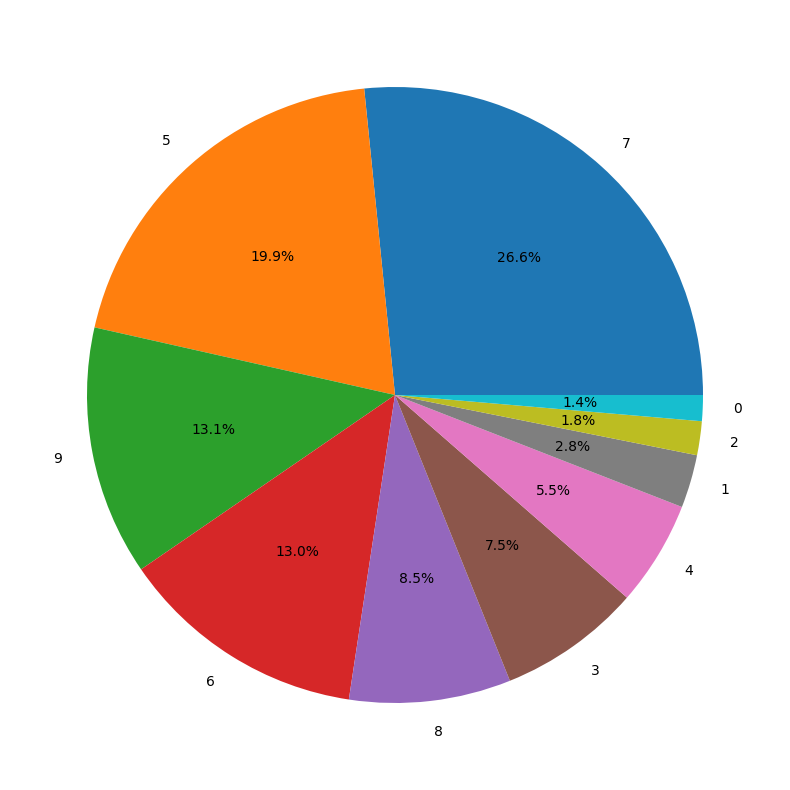

In [98]:
# pie for ratings
plt.figure(figsize=(10, 10))
plt.pie(ratings['rating'].value_counts(), labels=ratings['rating'].value_counts().index, autopct='%1.1f%%')

In [99]:
# split ratings into train and test
from sklearn.model_selection import train_test_split
target = ratings.pop('rating')
train, test, y_train, y_test = train_test_split(ratings, target, test_size=0.2, random_state=42, stratify=target)

In [124]:
while True:
    i = np.random.randint(0, len(ratings))
    idx = ratings.iloc[i].userId
    user = users.loc[idx]
user

KeyboardInterrupt: 

In [127]:
users.loc[599]

positive_0             space
positive_1            comedy
positive_2               sci
positive_3                fi
positive_4           classic
positive_5          violence
positive_6              dark
positive_7             great
positive_8            ending
positive_9             twist
neutral_0        atmospheric
neutral_1             travel
neutral_2               time
neutral_3             comedy
neutral_4               dark
neutral_5            thought
neutral_6          provoking
neutral_7             disney
neutral_8     cinematography
neutral_9          dreamlike
negative_0            comedy
negative_1         superhero
negative_2             funny
negative_3               bad
negative_4           netflix
negative_5             queue
negative_6           ferrell
negative_7              dark
negative_8              book
negative_9              plot
Name: 599, dtype: object

In [128]:
ratings[]

,userId,movieId
0,1,1
1,1,3
2,1,6
3,1,47
4,1,50
...,...,...
100831,610,166534
100832,610,168248
100833,610,168250
100834,610,168252


In [131]:
from torch.utils.data import Dataset, DataLoader

class MovieLensDataset(Dataset):
    def __init__(self, users, movies, ratings, target):
        self.users = users
        self.movies = movies
        self.ratings = ratings
        self.target = target
        
    def __len__(self):
        return len(self.ratings)
    
    def __getitem__(self, idx):
        user = self.users.loc[self.ratings.iloc[idx]['userId']]
        movie = self.movies.loc[self.ratings.iloc[idx]['movieId']]
        rating = self.target.iloc[idx]
        return {
            'user': user,
            'movie': movie,
            'rating': rating
        }
    
train_dataset = MovieLensDataset(users, movies, train, y_train)
test_dataset = MovieLensDataset(users, movies, test, y_test)
train_dataset[0]

{'user': positive_0             space
 positive_1            comedy
 positive_2               sci
 positive_3                fi
 positive_4           classic
 positive_5          violence
 positive_6              dark
 positive_7             great
 positive_8            ending
 positive_9             twist
 neutral_0        atmospheric
 neutral_1             travel
 neutral_2               time
 neutral_3             comedy
 neutral_4               dark
 neutral_5            thought
 neutral_6          provoking
 neutral_7             disney
 neutral_8     cinematography
 neutral_9          dreamlike
 negative_0            comedy
 negative_1         superhero
 negative_2             funny
 negative_3               bad
 negative_4           netflix
 negative_5             queue
 negative_6           ferrell
 negative_7              dark
 negative_8              book
 negative_9              plot
 Name: 599, dtype: object,
 'movie': title          multiplicity
 Other                     

In [133]:
import torch

def collate_fn(batch):
    # users = torch.stack([x[0] for x in batch])
    # movies = torch.stack([x[0] for x in batch])
    # ratings = torch.stack([x[2] for x in batch])
    users = [x['user'] for x in batch]
    movies = [x['movie'] for x in batch]
    ratings = torch.tensor([x['rating'] for x in batch], dtype=torch.long)
    return [users, movies], ratings

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
for x, y in train_loader:
    print(y.shape)
    print(x)

    break

torch.Size([32])
[[positive_0             space
positive_1            comedy
positive_2               sci
positive_3                fi
positive_4           classic
positive_5          violence
positive_6              dark
positive_7             great
positive_8            ending
positive_9             twist
neutral_0        atmospheric
neutral_1             travel
neutral_2               time
neutral_3             comedy
neutral_4               dark
neutral_5            thought
neutral_6          provoking
neutral_7             disney
neutral_8     cinematography
neutral_9          dreamlike
negative_0            comedy
negative_1         superhero
negative_2             funny
negative_3               bad
negative_4           netflix
negative_5             queue
negative_6           ferrell
negative_7              dark
negative_8              book
negative_9              plot
Name: 599, dtype: object, positive_0         comedy
positive_1          twist
positive_2         ending
positiv

In [ ]:
from torch import nn
import torch.nn.functional as F

class Recommender(nn.Module):
    def __init__(self, n_tokens, user_titles=['positive', 'negative', 'neutral'], emb_size=25):
        super().__init__()
        # User encoder
